# Proyecto dataset Titanic EDA y Modelo Machine Learning

In [15]:
#Importacion de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

# Configurar estilo de visualizaciones
sns.set(style="whitegrid")
%matplotlib inline

In [4]:
# Cargar datos
df = pd.read_csv('train.csv')

# Mostrar las primeras 5 filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Informacion general del dataset
print("Informacion general del dataset:")
df.info()

#Estadisticas generales del dataset
print("Estadisticas generales del dataset:")
df.describe()

#Cantidad de valores nulos por columna
print("Cantidad de valores nulos por columna:")
df.isnull().sum()

Informacion general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Estadisticas generales del dataset:
Cantidad de valores nulos por columna:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Rellenar valores nulos en 'Age' con la mediana
df['Age'] = df['Age'].fillna(df['Age'].median())

#Rellenar valores nulos en 'Embarked' con la moda
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#Eliminar columna 'Cabin' por tener muchos valores nulos
df = df.drop('Cabin', axis=1)

#Verificacion de valores nulos
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# ¿Cuantos pasajeros sobrevivieron?

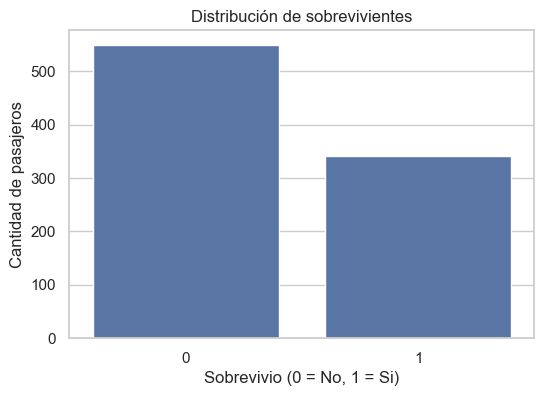

Porcentaje de sobrevivientes: 38.38%


In [7]:
#Grafico de barras de sobrevivientes
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Distribución de sobrevivientes')
plt.xlabel('Sobrevivio (0 = No, 1 = Si)')
plt.ylabel('Cantidad de pasajeros')
plt.show()

#Porcentaje de sobrevivientes
survival_rate = df['Survived'].mean() * 100
print(f'Porcentaje de sobrevivientes: {survival_rate:.2f}%')

# ¿Influyo el sexo en la supervivencia de los pasajerons?

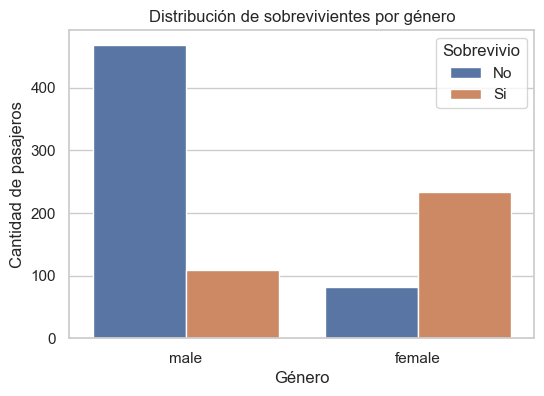

In [8]:
# Grafico de barras de sobrevivientes por genero
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex',hue='Survived', data=df)
plt.title('Distribución de sobrevivientes por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de pasajeros')
plt.legend(title='Sobrevivio', labels=['No', 'Si'])
plt.show()

# ¿Como se distribuye la edad de los pasajeros?

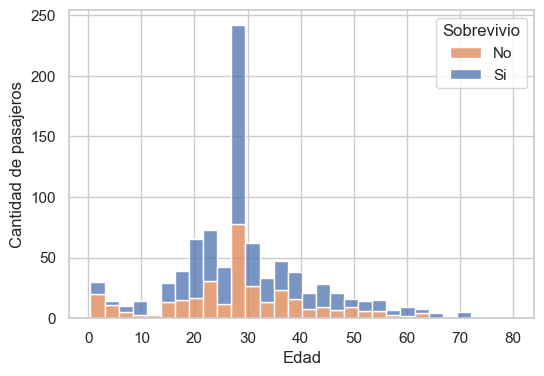

In [9]:
# Grafico de distribucion de edad de los pasajeros
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, multiple='stack')
plt.xlabel('Edad')
plt.ylabel('Cantidad de pasajeros')
plt.legend(title='Sobrevivio', labels=['No', 'Si'])
plt.show()

# ¿El puerto de embarque afectó las chances de sobrevivir?

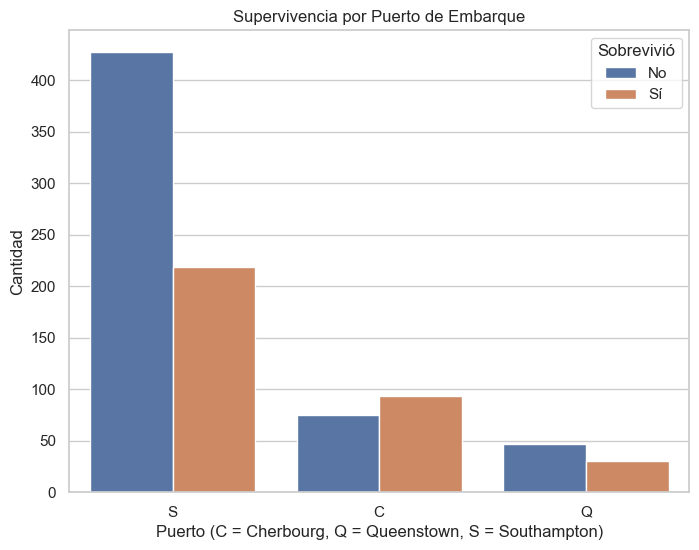

In [10]:
#Grafico para relacion entre embarque y supervivencia
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Supervivencia por Puerto de Embarque')
plt.xlabel('Puerto (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Cantidad')
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])
plt.show()

# ¿Los pasajeros con más familiares a bordo tenían más o menos probabilidades de sobrevivir?

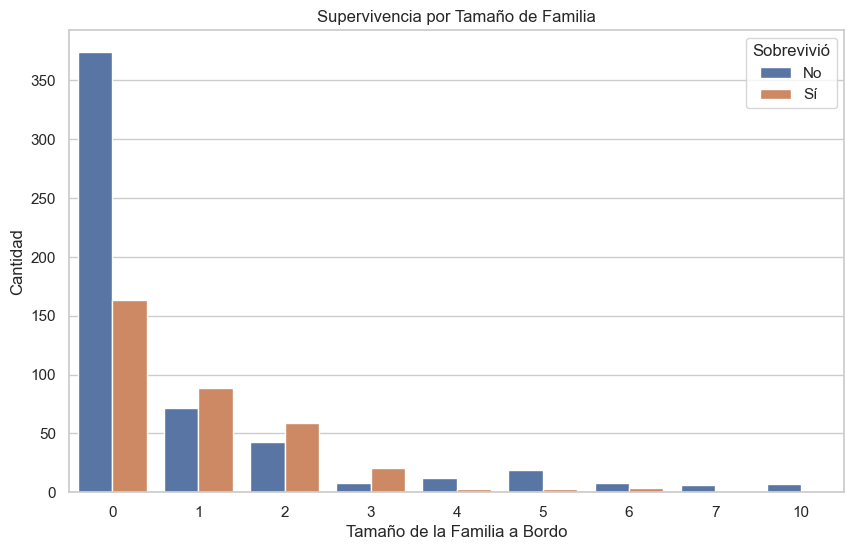

In [11]:
#Grafico de Familias y su supervivencia
df['FamilySize'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Supervivencia por Tamaño de Familia')
plt.xlabel('Tamaño de la Familia a Bordo')
plt.ylabel('Cantidad')
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])
plt.show()

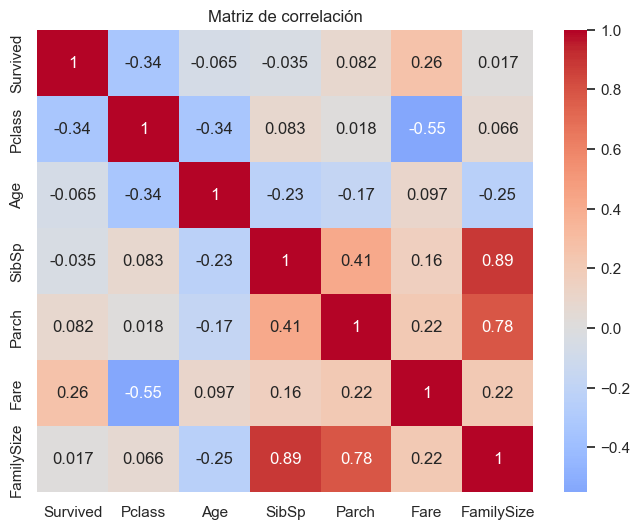

In [12]:
#Grafico de correlacion entre variables numericas
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']].corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación')
plt.show()

### Prueba de hipotesis

Haremos el analisis de la hipotesis de que la columna 'Pclass' no afecta la supervicencia.

Exploramos la tasa de supervivencia por clase social 

Tasa de supervivencia por clase:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


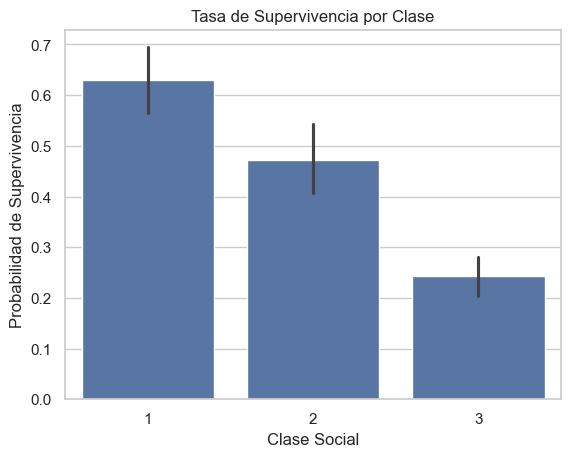

In [13]:
# Tasa de supervivencia por clase
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("Tasa de supervivencia por clase:\n", survival_by_class)

# Visualización
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Tasa de Supervivencia por Clase')
plt.ylabel('Probabilidad de Supervivencia')
plt.xlabel('Clase Social')
plt.show()

Planteamiento de hipotesis

Hipotesis Nula: No hay diferencia en la probabilidad de supervivencia entre las clases sociales

Hipotesis Alternativa: La clase social afecta significativamente la probabilidad de supervivencia 

In [16]:
# Tabla de contingencia
contingency_table = pd.crosstab(df['Pclass'], df['Survived'])
print("Tabla de contingencia:\n", contingency_table)

# Prueba de chi-cuadrado
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Estadístico Chi2: {chi2}")
print(f"Valor p: {p_value}")
print(f"Grados de libertad: {dof}")

# Interpretación
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Rechazamos H₀: Hay evidencia de que la clase social afecta la supervivencia.")
else:
    print("No rechazamos H₀: No hay evidencia suficiente de que la clase social afecte la supervivencia.")

Tabla de contingencia:
 Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Estadístico Chi2: 102.88898875696056
Valor p: 4.549251711298793e-23
Grados de libertad: 2
Rechazamos H₀: Hay evidencia de que la clase social afecta la supervivencia.


Vamos a separar un dataframe para la creacion de un modelo que pueda predecir si un pasajero del titanic pueda sobrevivir o no donde 0 es no sobrevivio y 1 sobrevivio en la columna de 'Survied'

In [17]:
# Copiamos el dataframe a otra variable para no afectar el original
train = df.copy()

# Rellenar valores faltantes
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Eliminar columnas no útiles
train = train.drop(['Ticket', 'Name', 'PassengerId'], axis=1)

# Convertir variables categóricas en dummy
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

#Verificacion de primeras filas
train.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22264\3530398938.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22264\3530398938.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,True,False,True
1,1,1,38.0,1,0,71.2833,1,False,False,False
2,1,3,26.0,0,0,7.9250,0,False,False,True
3,1,1,35.0,1,0,53.1000,1,False,False,True
4,0,3,35.0,0,0,8.0500,0,True,False,True


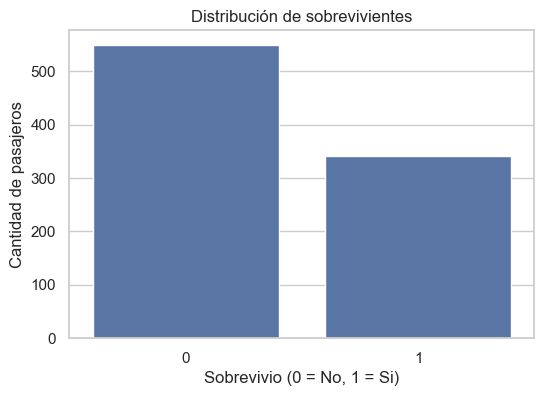

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [ ]:
#Grafico para visualizar la distribucion de la clases en 'Survived'
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train)
plt.title('Distribución de sobrevivientes')
plt.xlabel('Sobrevivio (0 = No, 1 = Si)')
plt.ylabel('Cantidad de pasajeros')
plt.show()

print(train['Survived'].value_counts(1))


Crearemos 2 modelos para ver cual es el que mejor desempeño tiene uno de Regresion Logistica y uno de Bosque Aleatorio 

In [ ]:
#Separamos caracteristicas y objetivo
X = train.drop('Survived', axis=1)
y = train['Survived']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de regresión logística
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para AUC-ROC

# Evaluar el modelo
print("Precisión:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_prob))

Precisión: 0.8100558659217877
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

AUC-ROC: 0.8826254826254827


Podemos observar que el modelo de regresion logistica funciona bien pero vamos a revisar si el modelo de bosque aleatorio puede mejorar los resultados

In [ ]:
# Entrenar Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir y evaluar
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Precisión Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_rf))
print("AUC-ROC Random Forest:", roc_auc_score(y_test, y_prob_rf))

Precisión Random Forest: 0.8268156424581006
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

AUC-ROC Random Forest: 0.8969755469755469


Hay un pequeña mejor en los resultados que obtiene el bosque aleatorio, vamos a analizar la importancia de las caracteristicas y analizar cuales variables tiene mas impacto en la prediccion.

In [ ]:
# Importancia de las características
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Importancia de las características:\n", feature_importance)

Importancia de las características:
 Sex_male      0.269929
Fare          0.263467
Age           0.244759
Pclass        0.085796
FamilySize    0.052449
SibSp         0.031375
Parch         0.022035
Embarked_S    0.021867
Embarked_Q    0.008322
dtype: float64


Podemos observar que el genero, la edad y la tarifa que se pago son los que mas influyen en la supervivencia 

Vamos a hacer una validacion cruzada para los modelos y posteriormente buscaremos mejores parametros con GridSearchCV

In [ ]:
# Validación cruzada simple
log_model = LogisticRegression(max_iter=2000, random_state=42)
cv_scores_log = cross_val_score(log_model, X_train, y_train, cv=5, scoring='accuracy')
print("Precisión media (Regresión Logística) con validación cruzada:", cv_scores_log.mean())

Precisión media (Regresión Logística) con validación cruzada: 0.7906628582684921


In [ ]:
#Parametros para busqueda de hiperparametros
param_grid_log = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid_search_log = GridSearchCV(LogisticRegression(max_iter=2000, random_state=42), param_grid_log, cv=5, scoring='accuracy')
grid_search_log.fit(X_train, y_train)

# Resultados de GridSearchCV
print("\nMejores parámetros (Regresión Logística):", grid_search_log.best_params_)
print("Mejor precisión (Regresión Logística):", grid_search_log.best_score_)


Mejores parámetros (Regresión Logística): {'C': 1, 'solver': 'liblinear'}
Mejor precisión (Regresión Logística): 0.7962966610853935


In [ ]:
# Evaluación en el conjunto de prueba
best_log_model = grid_search_log.best_estimator_
y_pred_log = best_log_model.predict(X_test)
y_prob_log = best_log_model.predict_proba(X_test)[:, 1]
print("\nPrecisión en test (Regresión Logística):", accuracy_score(y_test, y_pred_log))
print("Reporte de clasificación (Regresión Logística):\n", classification_report(y_test, y_pred_log))
print("AUC-ROC (Regresión Logística):", roc_auc_score(y_test, y_prob_log))


Precisión en test (Regresión Logística): 0.7821229050279329
Reporte de clasificación (Regresión Logística):
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

AUC-ROC (Regresión Logística): 0.8781209781209781


In [ ]:
# Validación cruzada simple
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("\nPrecisión media (Random Forest) con validación cruzada:", cv_scores_rf.mean())


Precisión media (Random Forest) con validación cruzada: 0.7879346006106569


In [ ]:
# Ajuste de hiperparámetros con GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Resultados de GridSearchCV
print("\nMejores parámetros (Random Forest):", grid_search_rf.best_params_)
print("Mejor precisión (Random Forest):", grid_search_rf.best_score_)




Mejores parámetros (Random Forest): {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Mejor precisión (Random Forest): 0.8314192849404117


In [ ]:
# Evaluación en el conjunto de prueba
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]
print("\nPrecisión en test (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("Reporte de clasificación (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("AUC-ROC (Random Forest):", roc_auc_score(y_test, y_prob_rf))


Precisión en test (Random Forest): 0.8435754189944135
Reporte de clasificación (Random Forest):
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       105
           1       0.86      0.74      0.80        74

    accuracy                           0.84       179
   macro avg       0.85      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

AUC-ROC (Random Forest): 0.9006435006435007


Con la validacion cruzada obtenemos una estimacion mas robusta y un resultado mas real al ser mas critico en la evaluacion y despues de buscar mejor hiperparametros pudimos mejor las metricas en bosque aleatorio.